## Computing Resources

(For LIGO/LVK members only) 
### [LIGO Data Grid](https://computing.docs.ligo.org/guide/computing-centres/ldg/)
The LIGO Data Grid (LDG) is a coordinated set of distributed computing centres operated by LIGO member groups as a subset of the IGWN Computing Grid. These computing centres share authentication infrastructure, among other things, to present a similar user experience across locations.

### [CIT](https://computing.docs.ligo.org/guide/computing-centres/cit/)
Caltech computing center. You can access login nodes for specific purposes or general use, including different types of computing resources like CPUs and GPUs. 

### [git.ligo.org](https://git.ligo.org)
All LIGO members have a gitlab account that you can use to host your projects.

## Public Resources

### [GWOSC](https://gwosc.org)
Gravitational Wave Open Science Center, which contains GW data, tutorials, and software tools. Also hosts the [GW Open Data Workshops](https://gwosc.org/workshops/) each year.

### [GraceDB](https://gracedb.ligo.org)
Provides a centralized location for aggregating and retrieving information about candidate gravitational-wave events. You can set up alerts for when we detect signals during the observing runs

## Python Packages

### `PESummary`

Used to create PESummary webpages, but can also be used to fetch [public GW data](https://lscsoft.docs.ligo.org/pesummary/stable/gw/fetch.html#public-data)

### [`Bilby`](https://bilby-dev.github.io/bilby/)
The aim of bilby is to provide a user-friendly interface to perform parameter estimation. It is primarily designed and built for inference of compact binary coalescence events in interferometric data, but it can also be used for more general problems. Can be used for single event parameter estimate and population inference (hyper-parameter estimation)

### [`gwpopulation`](https://colmtalbot.github.io/gwpopulation/index.html)
Flexible, extensible, hardware-agnostic gravitational-wave population inference. Tutorial on how to do population inference with GWTC-3 can be found [here](https://colmtalbot.github.io/gwpopulation/examples/GWTC3.html)

### [`gwpopulation_pipe`](https://docs.ligo.org/RatesAndPopulations/gwpopulation_pipe/#)
command-line interface for population inference with gwpopulation. All you need is a `config.ini` file, `prior.prior` file, and any custome models saved in a python file. `gwpopulation_pipe` will then generate all of the preprocessing, analysis, and postprocessing scripts you'll need, along with a HTCondor submit scripts.




## Population Inference

See [Mandel et. al 2019](https://arxiv.org/pdf/1809.02063) for derivation of the hierarchical likelihood that we use in population inference.

## Example of reading in PE data

In [ ]:
!gdown https://drive.google.com/uc?id=16gStLIjt65gWBkw-gNOVUqNbZ89q8CLF
!gdown https://drive.google.com/uc?id=10pevUCM3V2-D-bROFEMAcTJsX_9RzeM6

zsh:1: no matches found: https://drive.google.com/uc?id=16gStLIjt65gWBkw-gNOVUqNbZ89q8CLF
zsh:1: no matches found: https://drive.google.com/uc?id=10pevUCM3V2-D-bROFEMAcTJsX_9RzeM6


In [15]:
import pandas
import matplotlib.pyplot as plt

In [53]:
dat = pandas.read_pickle('/home/jaxen.godfrey/gwanw_2025/gwtc-3-samples.pkl')

print(f'there are {len(dat)} events contained in GWTC-3\n')
print('Here is an example of the posterior samples for a single event:')
dat[0]

there are 73 events contained in GWTC-3

Here is an example of the posterior samples for a single event:


mass_1  mass_ratio       a_1       a_2  cos_tilt_1  cos_tilt_2  \
50071   33.136361    0.947207  0.404503  0.497368    0.969833   -0.830245   
81420   35.521402    0.764971  0.292579  0.049531   -0.762859   -0.239064   
3832    36.359435    0.840993  0.626148  0.749870    0.012735    0.220519   
114471  33.348556    0.972678  0.062689  0.117746   -0.253675    0.549356   
46641   34.242166    0.825938  0.476832  0.154817   -0.441843   -0.915523   
...           ...         ...       ...       ...         ...         ...   
75074   33.474866    0.973315  0.695592  0.090727    0.196613    0.497039   
72399   35.257598    0.867935  0.291883  0.069884   -0.515272    0.329685   
58264   33.276222    0.943216  0.111093  0.032642   -0.023936   -0.880299   
48402   33.784014    0.849338  0.569377  0.615687   -0.064213   -0.598698   
127537  36.879618    0.836356  0.826267  0.042920    0.115525   -0.835264   

        redshift     prior  
50071   0.134033  0.454601  
81420   0.095303  0.247454  
3832    0.111405  0.345586  
114471  0.109960  0.308843  
46641   0.075218  0.148797  
...          ...       ...  
75074   0.131470  0.442006  
72399   0.063814  0.110345  
58264   0.088038  0.197934  
48402   0.066827  0.115946  
127537  0.086457  0.211599  

[6913 rows x 8 columns]

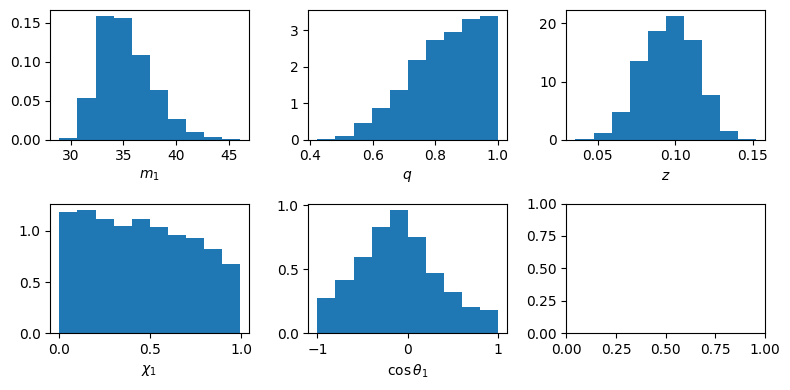

In [33]:
fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (8,4))

ax = axes[0,0]
ax.hist(dat[0]['mass_1'], density = True)
ax.set_xlabel(r'$m_1$');

ax = axes[0,1]
ax.hist(dat[0]['mass_ratio'], density = True)
ax.set_xlabel(r'$q$');

ax = axes[0,2]
ax.hist(dat[0]['redshift'], density = True)
ax.set_xlabel(r'$z$');

ax = axes[1,0]
ax.hist(dat[0]['a_1'], density = True)
ax.set_xlabel(r'$\chi_1$');

ax = axes[1,1]
ax.hist(dat[0]['cos_tilt_1'], density = True)
ax.set_xlabel(r'$\cos\theta_1$');

plt.tight_layout()

## Example of reading in injections

In [43]:
dat = pandas.read_pickle('/home/jaxen.godfrey/gwanw_2025/gwtc-3-injections.pkl')

In [49]:
print(f'there are {dat['mass_1'].shape[0]} total injections')

there are 41972 total injections


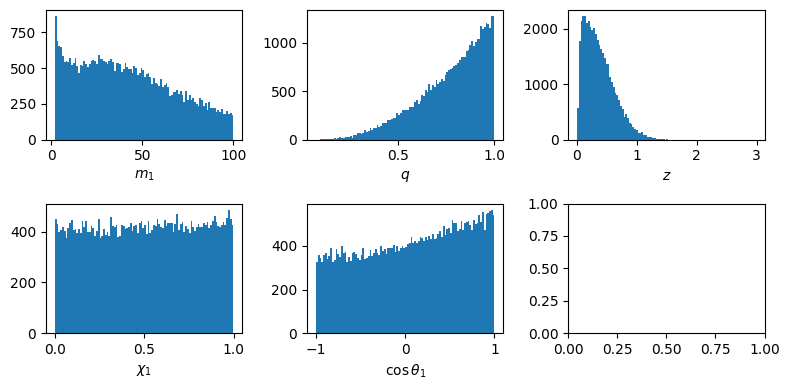

In [46]:
fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (8,4))

ax = axes[0,0]
ax.hist(dat['mass_1'], bins = 100)
ax.set_xlabel(r'$m_1$');

ax = axes[0,1]
ax.hist(dat['mass_ratio'], bins = 100)
ax.set_xlabel(r'$q$');

ax = axes[0,2]
ax.hist(dat['redshift'], bins = 100)
ax.set_xlabel(r'$z$');

ax = axes[1,0]
ax.hist(dat['a_1'], bins = 100)
ax.set_xlabel(r'$\chi_1$');

ax = axes[1,1]
ax.hist(dat['cos_tilt_1'], bins = 100)
ax.set_xlabel(r'$\cos\theta_1$');

plt.tight_layout()